In [1]:
# imports 
import json
import numpy as np
import torch
import torchvision
import cv2
from torchvision import transforms
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
model_faster_rcnn = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)

In [3]:
# data
with open("Dataset/COCO/annotations_trainval2017/annotations/instances_val2017.json", "r") as f:
    instances = json.load(f)
    
instances.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [4]:
instances["categories"]

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [5]:
ids_to_category = {v["id"]: v["name"] for v in instances["categories"]}
category_to_ids = {v["name"]: v["id"] for v in instances["categories"]}

In [6]:
PERSON_LABEL = category_to_ids["person"]
PERSON_LABEL

1

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [12]:
"""
this function will perform inference on the faster rcnn model, and get the 
labels, scores, bboxes, for each object detected in the image.
"""

def detect_object_and_plot(img_path, label_to_detect = 1, score_threshold = 0.75, model = model_faster_rcnn, device = "cuda", input_width = 100, input_height = 100):
    
    # eval mode
    model = model.to(device)
    model.eval()
    
    # open the image & converting to RGB
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # image tensor
    image_tensor = transforms.ToTensor()(img).unsqueeze_(0)
    image_tensor = image_tensor.to(device)
    
    with torch.no_grad():
        preds = model(image_tensor)
    
    
    
    object_indices = (preds[0]["labels"] == label_to_detect).nonzero()
    bboxes = (preds[0]["boxes"][object_indices]).int().cpu().numpy()
    scores = (preds[0]["scores"][object_indices]).cpu().numpy()
    num_objects = bboxes.shape[0]
        
    
    # for each object, plot the bbox
    displayed_objs = 0
    colors = ["red", "green", "blue", "pink", "yellow"]    
    for i in range(num_objects):
        if scores[i] > score_threshold:
            displayed_objs += 1
            
            #plotting
            fig = plt.figure(i, figsize = (18, 18))
            ax1 = fig.add_subplot(121)
            ax1.imshow(img)
            
            
            # draw bbox
            x_start, y_start, x_end, y_end = bboxes[i][0]
            color = colors[i % len(colors)]
            ax1.add_patch(Rectangle((x_start, y_start), x_end - x_start, y_end - y_start, alpha = 0.4, facecolor = color, edgecolor = color, hatch = "x"))
            
            
            # rescale the area
            rescaled_image = cv2.resize(img[y_start:y_end, x_start:x_end], (input_width, input_height))
            #rescaled_image = cv2.resize(img, (input_width, input_height), (x_start, y_start, x_end, y_end))
                
            ax2 = fig.add_subplot(122)
            ax2.imshow(rescaled_image)

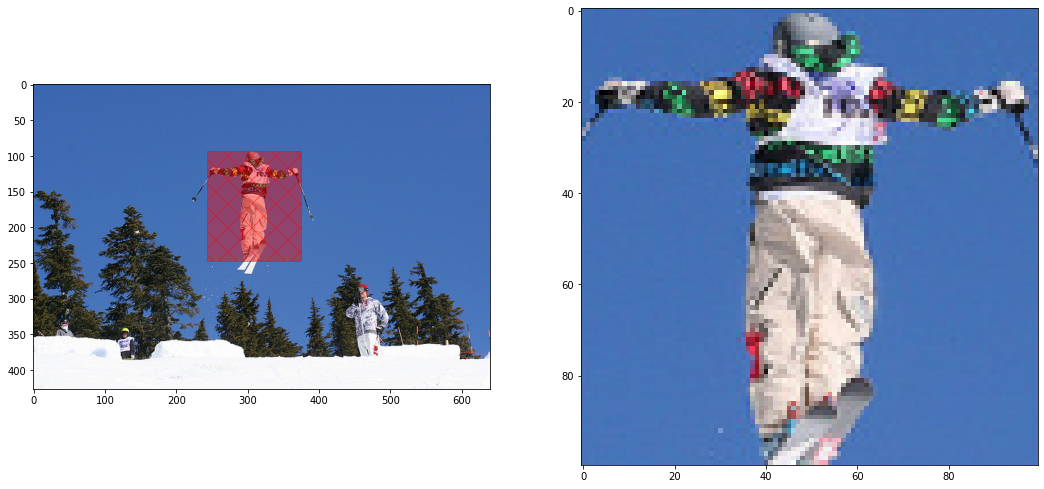

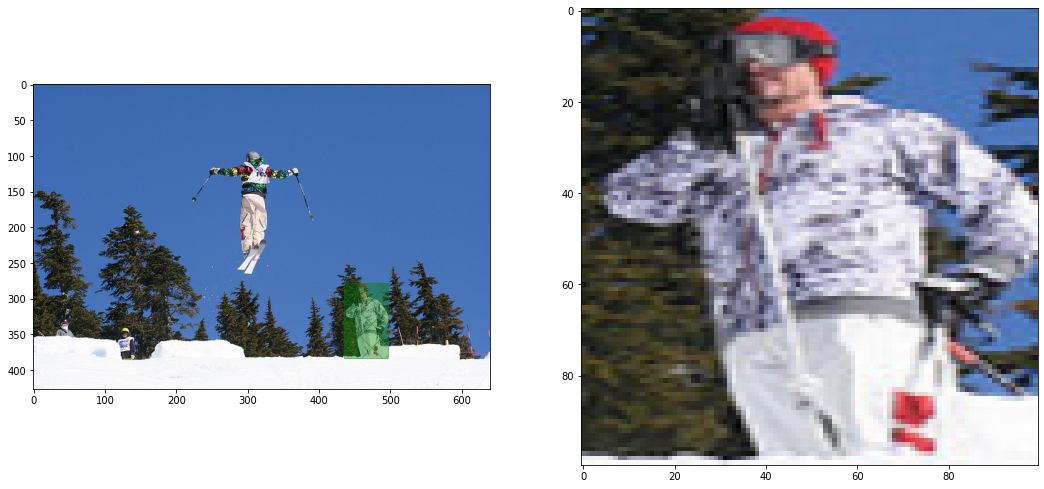

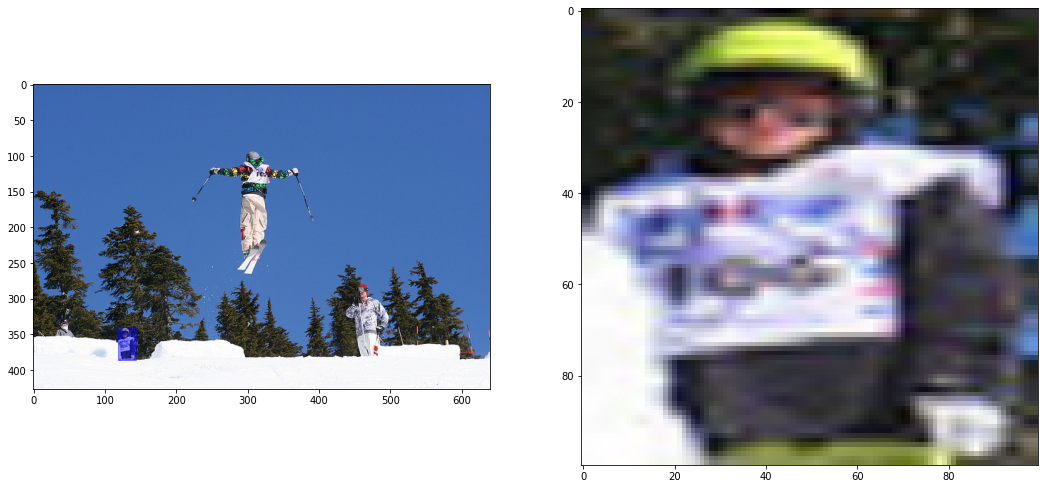

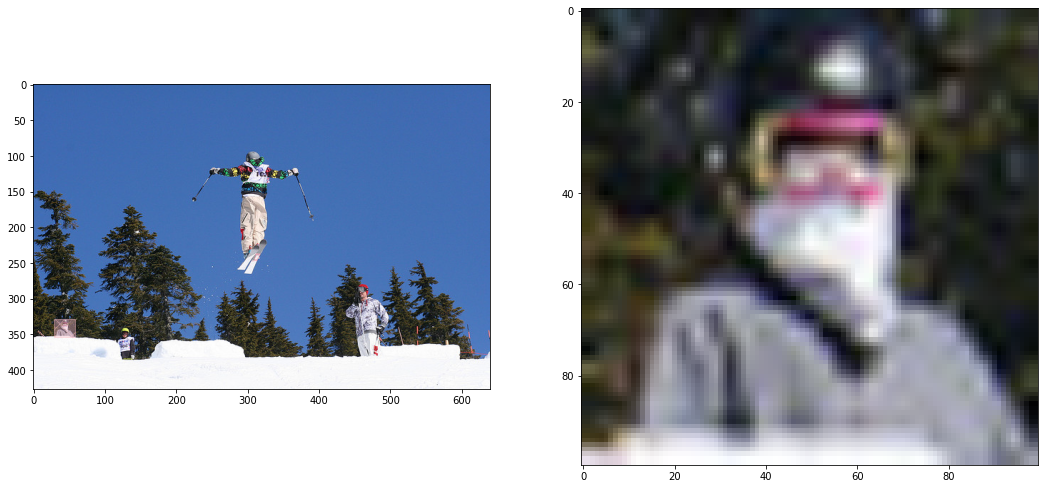

In [13]:
detect_object_and_plot("Dataset/COCO/val2017/000000002473.jpg", model = model_faster_rcnn)

/home/trinity/anaconda3/envs/humanpose/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


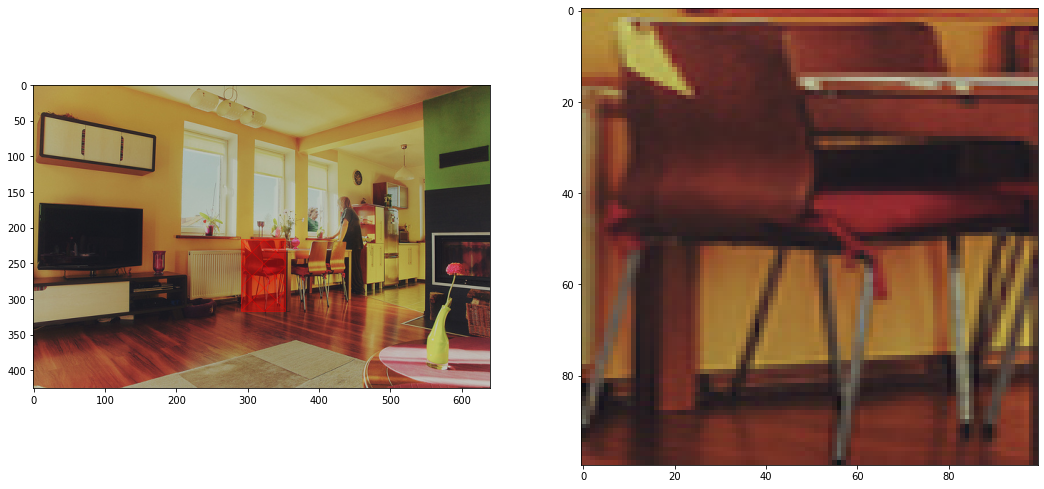

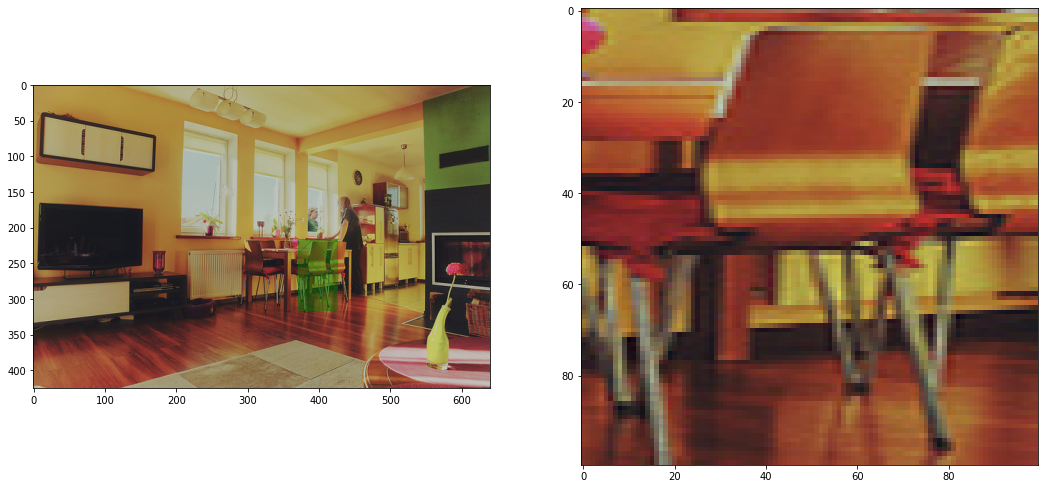

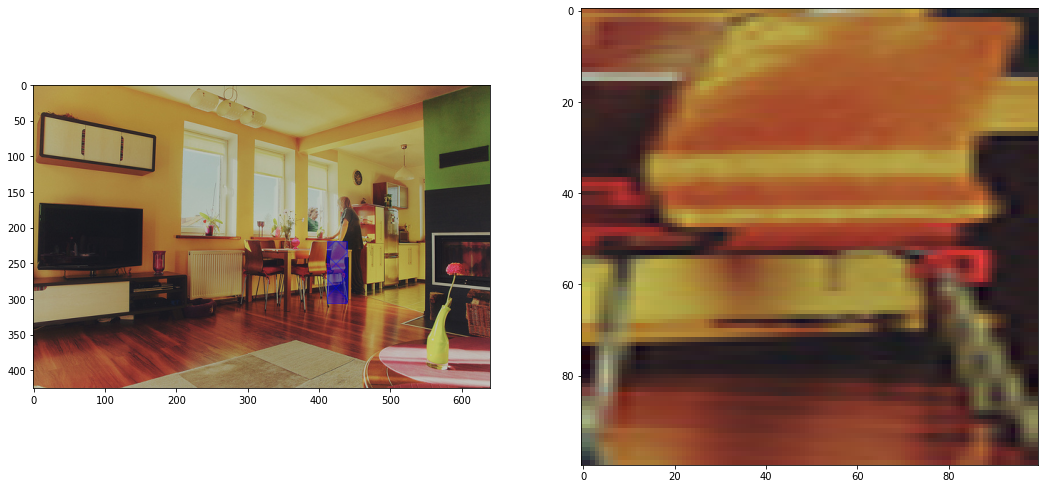

In [14]:
detect_object_and_plot("Dataset/COCO/val2017/000000000139.jpg", label_to_detect = category_to_ids["chair"])